In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [104]:
#https://www.kaggle.com/datasets/smid80/weatherww2/data

In [105]:
# Today, we will be exploring Weather data of WW2 period. We will first understand the data(make sure to read up on column info on Kaggle!), then clean the data and gradually prepare it for model training where we will create a "Multi-Linear Regression Model" that can predict Max temperature given the input!

In [106]:
df = pd.read_csv("Summary of Weather.csv")

C:\Users\EXPORT\AppData\Local\Temp\ipykernel_5576\2360501030.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Summary of Weather.csv")


In [107]:
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
df.info() # This is the first ever valuable insight for us. We see lots of non-null columns and "object" data types, which are worthless to us in terms of machine learning. We will first try to get rid of empty and unnecessary columns, then convert object data types to an integer or a float.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

In [109]:
#Cleansing empty/insufficient data

In [110]:
df.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [111]:
df[df.isnull().any(axis=1)] #ALL of the rows have at least one NaN value, so if we try dropping non available values, our DF would be completely empty.

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
empty_cols = [col for col in df.columns if df[col].count() < df.count().max() / 2] #Let's get rid of columns where at least half of the entries are missing.

In [113]:
empty_cols

['WindGustSpd',
 'PoorWeather',
 'DR',
 'SPD',
 'SND',
 'FT',
 'FB',
 'FTI',
 'ITH',
 'PGT',
 'TSHDSBRSGF',
 'SD3',
 'RHX',
 'RHN',
 'RVG',
 'WTE']

In [114]:
df.drop(empty_cols, axis=1, inplace=True)

In [115]:
df.info() #We got a lot of empty columns out of the way.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Date      119040 non-null  object 
 2   Precip    119040 non-null  object 
 3   MaxTemp   119040 non-null  float64
 4   MinTemp   119040 non-null  float64
 5   MeanTemp  119040 non-null  float64
 6   Snowfall  117877 non-null  object 
 7   YR        119040 non-null  int64  
 8   MO        119040 non-null  int64  
 9   DA        119040 non-null  int64  
 10  PRCP      117108 non-null  object 
 11  MAX       118566 non-null  float64
 12  MIN       118572 non-null  float64
 13  MEA       118542 non-null  float64
 14  SNF       117877 non-null  object 
dtypes: float64(6), int64(4), object(5)
memory usage: 13.6+ MB


In [116]:
df.shape

(119040, 15)

In [117]:
df.isnull().value_counts() #We see that we have 115697 rows with all available values which is great. Rows with at least one missing data is pretty small, so we can safely drop the rows with missing data.

STA    Date   Precip  MaxTemp  MinTemp  MeanTemp  Snowfall  YR     MO     DA     PRCP   MAX    MIN    MEA    SNF  
False  False  False   False    False    False     False     False  False  False  False  False  False  False  False    115697
                                                                                 True   False  False  False  False      1693
                                                  True      False  False  False  False  False  False  False  True        922
                                                  False     False  False  False  False  True   True   True   False       432
                                                  True      False  False  False  True   False  False  False  True        228
                                                  False     False  False  False  False  True   False  True   False        28
                                                                                        False  True   True   False        13
          

In [118]:
df.dropna(inplace=True)

In [119]:
# We successfully got rid of all empty columns and columns with insufficient data

In [120]:
df.isnull().sum() #No missing values which is great!

STA         0
Date        0
Precip      0
MaxTemp     0
MinTemp     0
MeanTemp    0
Snowfall    0
YR          0
MO          0
DA          0
PRCP        0
MAX         0
MIN         0
MEA         0
SNF         0
dtype: int64

In [121]:
df.shape #115697 rows, 15 columns

(115697, 15)

In [122]:
# Let's explore values and types. We want to stick to int/float, change object types when possible and get rid of unnecessary colums.

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115697 entries, 0 to 119039
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       115697 non-null  int64  
 1   Date      115697 non-null  object 
 2   Precip    115697 non-null  object 
 3   MaxTemp   115697 non-null  float64
 4   MinTemp   115697 non-null  float64
 5   MeanTemp  115697 non-null  float64
 6   Snowfall  115697 non-null  object 
 7   YR        115697 non-null  int64  
 8   MO        115697 non-null  int64  
 9   DA        115697 non-null  int64  
 10  PRCP      115697 non-null  object 
 11  MAX       115697 non-null  float64
 12  MIN       115697 non-null  float64
 13  MEA       115697 non-null  float64
 14  SNF       115697 non-null  object 
dtypes: float64(6), int64(4), object(5)
memory usage: 14.1+ MB


In [124]:
df["Precip"].value_counts()

Precip
0          61779
T          16451
0.254       3323
0.508       2846
0.762       1974
           ...  
242.316        1
154.686        1
105.918        1
133.096        1
161.036        1
Name: count, Length: 540, dtype: int64

In [125]:
#Let's ask ChatGPT about this "T" value in our dataset. The important part is giving as much detail about our dataset as possible so ChatGPT gives a confident response.

#"0" mm → This means no measurable precipitation occurred during the observation period. In other words, it was completely dry.
#"T" (Trace) → This means a tiny amount of precipitation fell, but it was too small to be measured accurately with standard instruments (usually less than 0.1 mm). For example, a few raindrops or a very light dusting of snow that doesn’t accumulate enough to register as 0.1 mm or more.
#📌 In summary:
#0 mm = nothing fell.
#T = something fell, but it was negligible (trace amount).

In [126]:
df["Precip"] = np.where(df["Precip"].str.contains("T"), 0.1, df["Precip"]) #Let's just assume T is 0.1 and replace everything with it.

In [127]:
df["Precip"] = df["Precip"].astype(float)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115697 entries, 0 to 119039
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       115697 non-null  int64  
 1   Date      115697 non-null  object 
 2   Precip    115697 non-null  float64
 3   MaxTemp   115697 non-null  float64
 4   MinTemp   115697 non-null  float64
 5   MeanTemp  115697 non-null  float64
 6   Snowfall  115697 non-null  object 
 7   YR        115697 non-null  int64  
 8   MO        115697 non-null  int64  
 9   DA        115697 non-null  int64  
 10  PRCP      115697 non-null  object 
 11  MAX       115697 non-null  float64
 12  MIN       115697 non-null  float64
 13  MEA       115697 non-null  float64
 14  SNF       115697 non-null  object 
dtypes: float64(7), int64(4), object(4)
memory usage: 14.1+ MB


In [129]:
df.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,0.0,42,7,1,0.04,78.0,72.0,75.0,0.0
1,10001,1942-7-2,0.000,28.888889,21.666667,25.555556,0.0,42,7,2,0,84.0,71.0,78.0,0.0
2,10001,1942-7-3,2.540,26.111111,22.222222,24.444444,0.0,42,7,3,0.1,79.0,72.0,76.0,0.0
3,10001,1942-7-4,2.540,26.666667,22.222222,24.444444,0.0,42,7,4,0.1,80.0,72.0,76.0,0.0
4,10001,1942-7-5,0.000,26.666667,21.666667,24.444444,0.0,42,7,5,0,80.0,71.0,76.0,0.0


In [130]:
df["Snowfall"].unique()

array([0.0, '0', '22.86', '33.02', '30.48', '2.54', '5.08', '10.16',
       '7.62', '20.32', '15.24', '17.78', '12.7', '25.4', '27.94',
       '43.18', '38.1', '45.72', '53.34', '58.42', '66.04', '76.2',
       '81.28', '73.66', '63.5', '50.8', '48.26', '60.96', '55.88',
       '35.56', '78.74', '40.64', '86.36', '83.82', '68.58', '#VALUE!',
       10.16, 7.62, 15.24, 2.54, 5.08, 12.7], dtype=object)

In [131]:
df["Snowfall"].value_counts() #More than 90% of the entries are literally just 0, this column would have no effect on our model, therefore we can safely drop this.

Snowfall
0.0        84589
0          28934
5.08         524
7.62         316
2.54         315
10.16        194
12.7          90
20.32         83
17.78         77
15.24         70
22.86         69
25.4          65
#VALUE!       44
27.94         40
30.48         31
45.72         25
50.8          24
48.26         22
2.54          22
35.56         20
33.02         15
60.96         13
66.04         11
38.1          11
7.62          11
43.18         10
10.16         10
53.34         10
63.5           7
5.08           7
55.88          6
40.64          6
58.42          5
76.2           5
15.24          4
81.28          4
12.7           2
78.74          2
73.66          1
86.36          1
83.82          1
68.58          1
Name: count, dtype: int64

In [132]:
df.drop("Snowfall", axis=1, inplace=True)

In [133]:
df.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,42,7,1,0.04,78.0,72.0,75.0,0.0
1,10001,1942-7-2,0.000,28.888889,21.666667,25.555556,42,7,2,0,84.0,71.0,78.0,0.0
2,10001,1942-7-3,2.540,26.111111,22.222222,24.444444,42,7,3,0.1,79.0,72.0,76.0,0.0
3,10001,1942-7-4,2.540,26.666667,22.222222,24.444444,42,7,4,0.1,80.0,72.0,76.0,0.0
4,10001,1942-7-5,0.000,26.666667,21.666667,24.444444,42,7,5,0,80.0,71.0,76.0,0.0


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115697 entries, 0 to 119039
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       115697 non-null  int64  
 1   Date      115697 non-null  object 
 2   Precip    115697 non-null  float64
 3   MaxTemp   115697 non-null  float64
 4   MinTemp   115697 non-null  float64
 5   MeanTemp  115697 non-null  float64
 6   YR        115697 non-null  int64  
 7   MO        115697 non-null  int64  
 8   DA        115697 non-null  int64  
 9   PRCP      115697 non-null  object 
 10  MAX       115697 non-null  float64
 11  MIN       115697 non-null  float64
 12  MEA       115697 non-null  float64
 13  SNF       115697 non-null  object 
dtypes: float64(7), int64(4), object(3)
memory usage: 13.2+ MB


In [135]:
df["Date"].unique() 

array(['1942-7-1', '1942-7-2', '1942-7-3', ..., '1941-7-7', '1941-7-15',
       '1941-7-19'], shape=(2192,), dtype=object)

In [136]:
df["Date"] = pd.to_datetime(df["Date"]) #Changing Date column to datetime. This actually turns out to be unnecessary in the end, but it is still good practice!

In [137]:
df["Day"] = df["Date"].dt.day
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

In [138]:
df.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF,Day,Month,Year
0,10001,1942-07-01,1.016,25.555556,22.222222,23.888889,42,7,1,0.04,78.0,72.0,75.0,0.0,1,7,1942
1,10001,1942-07-02,0.000,28.888889,21.666667,25.555556,42,7,2,0,84.0,71.0,78.0,0.0,2,7,1942
2,10001,1942-07-03,2.540,26.111111,22.222222,24.444444,42,7,3,0.1,79.0,72.0,76.0,0.0,3,7,1942
3,10001,1942-07-04,2.540,26.666667,22.222222,24.444444,42,7,4,0.1,80.0,72.0,76.0,0.0,4,7,1942
4,10001,1942-07-05,0.000,26.666667,21.666667,24.444444,42,7,5,0,80.0,71.0,76.0,0.0,5,7,1942


In [139]:
df.drop("Date", axis=1, inplace=True)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115697 entries, 0 to 119039
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       115697 non-null  int64  
 1   Precip    115697 non-null  float64
 2   MaxTemp   115697 non-null  float64
 3   MinTemp   115697 non-null  float64
 4   MeanTemp  115697 non-null  float64
 5   YR        115697 non-null  int64  
 6   MO        115697 non-null  int64  
 7   DA        115697 non-null  int64  
 8   PRCP      115697 non-null  object 
 9   MAX       115697 non-null  float64
 10  MIN       115697 non-null  float64
 11  MEA       115697 non-null  float64
 12  SNF       115697 non-null  object 
 13  Day       115697 non-null  int32  
 14  Month     115697 non-null  int32  
 15  Year      115697 non-null  int32  
dtypes: float64(7), int32(3), int64(4), object(2)
memory usage: 13.7+ MB


In [141]:
df["PRCP"].value_counts()

PRCP
0       61779
T       16451
0.01     3323
0.02     2846
0.03     1974
        ...  
9.54        1
6.09        1
4.17        1
5.24        1
6.34        1
Name: count, Length: 540, dtype: int64

In [142]:
df["Precip"].value_counts()

Precip
0.000      61779
0.100      16451
0.254       3323
0.508       2846
0.762       1974
           ...  
242.316        1
154.686        1
105.918        1
133.096        1
161.036        1
Name: count, Length: 540, dtype: int64

In [143]:
#Precip and PRCP are identical columns, so we can just get rid of the latter

In [144]:
df.drop("PRCP", axis=1, inplace=True)

In [145]:
df["SNF"].value_counts() #Again, more than 90% of the values are 0, therefore we can omit this column since the non zero values are minority and not enough data for our model

SNF
0.0    84589
0      28934
0.2      524
0.3      316
0.1      315
0.4      194
0.5       90
0.8       83
0.7       77
0.6       70
0.9       69
1         65
T         44
1.1       40
1.2       31
1.8       25
2         24
1.9       22
0.1       22
1.4       20
1.3       15
2.4       13
2.6       11
1.5       11
0.3       11
1.7       10
0.4       10
2.1       10
2.5        7
0.2        7
2.2        6
1.6        6
2.3        5
3          5
0.6        4
3.2        4
0.5        2
3.1        2
2.9        1
3.4        1
3.3        1
2.7        1
Name: count, dtype: int64

In [146]:
df.drop("SNF", axis=1, inplace=True)

In [147]:
df.head()

,STA,Precip,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,MAX,MIN,MEA,Day,Month,Year
0,10001,1.016,25.555556,22.222222,23.888889,42,7,1,78.0,72.0,75.0,1,7,1942
1,10001,0.000,28.888889,21.666667,25.555556,42,7,2,84.0,71.0,78.0,2,7,1942
2,10001,2.540,26.111111,22.222222,24.444444,42,7,3,79.0,72.0,76.0,3,7,1942
3,10001,2.540,26.666667,22.222222,24.444444,42,7,4,80.0,72.0,76.0,4,7,1942
4,10001,0.000,26.666667,21.666667,24.444444,42,7,5,80.0,71.0,76.0,5,7,1942


In [148]:
#Just realized that Year, Month and Day columns already existed! Also, temperatures are measured in both celcius and fahrenheit. Let's get rid of the unnecessary columns for clarity sake.

In [149]:
unnecessary_columns = ["YR", "MO", "DA", "MAX", "MIN", "MEA"]

In [150]:
df.drop(unnecessary_columns, axis=1, inplace=True)

In [151]:
df.duplicated().value_counts() #Turns out, we have duplicate rows. Always a good measure to get rid of identical rows.

False    115687
True         10
Name: count, dtype: int64

In [152]:
df.drop_duplicates(inplace=True)

In [153]:
df.duplicated().value_counts()

False    115687
Name: count, dtype: int64

In [154]:
df.info() #Dataset is entirely cleaned and ready for exploration

<class 'pandas.core.frame.DataFrame'>
Index: 115687 entries, 0 to 119039
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       115687 non-null  int64  
 1   Precip    115687 non-null  float64
 2   MaxTemp   115687 non-null  float64
 3   MinTemp   115687 non-null  float64
 4   MeanTemp  115687 non-null  float64
 5   Day       115687 non-null  int32  
 6   Month     115687 non-null  int32  
 7   Year      115687 non-null  int32  
dtypes: float64(4), int32(3), int64(1)
memory usage: 6.6 MB


In [155]:
df.describe() #This is the first time we can use the describe method since all the data is numerical and can be described!

,STA,Precip,MaxTemp,MinTemp,MeanTemp,Day,Month,Year
count,115687.000000,115687.000000,115687.000000,115687.000000,115687.000000,115687.000000,115687.000000,115687.000000
mean,29806.157295,3.303555,27.488107,18.140207,22.817291,15.790486,6.735018,1943.820619
std,20964.907340,10.916735,7.956863,7.828014,7.624198,8.796315,3.416371,1.125201
min,10001.000000,0.000000,-33.333333,-38.333333,-35.555556,1.000000,1.000000,1940.000000
25%,11801.000000,0.000000,25.555556,15.555556,21.111111,8.000000,4.000000,1943.000000
50%,22509.000000,0.000000,29.444444,21.111111,25.555556,16.000000,7.000000,1944.000000
75%,33501.000000,1.016000,31.666667,23.333333,27.222222,23.000000,10.000000,1945.000000
max,82506.000000,307.340000,50.000000,34.444444,40.000000,31.000000,12.000000,1945.000000


In [156]:
# Data Exploration

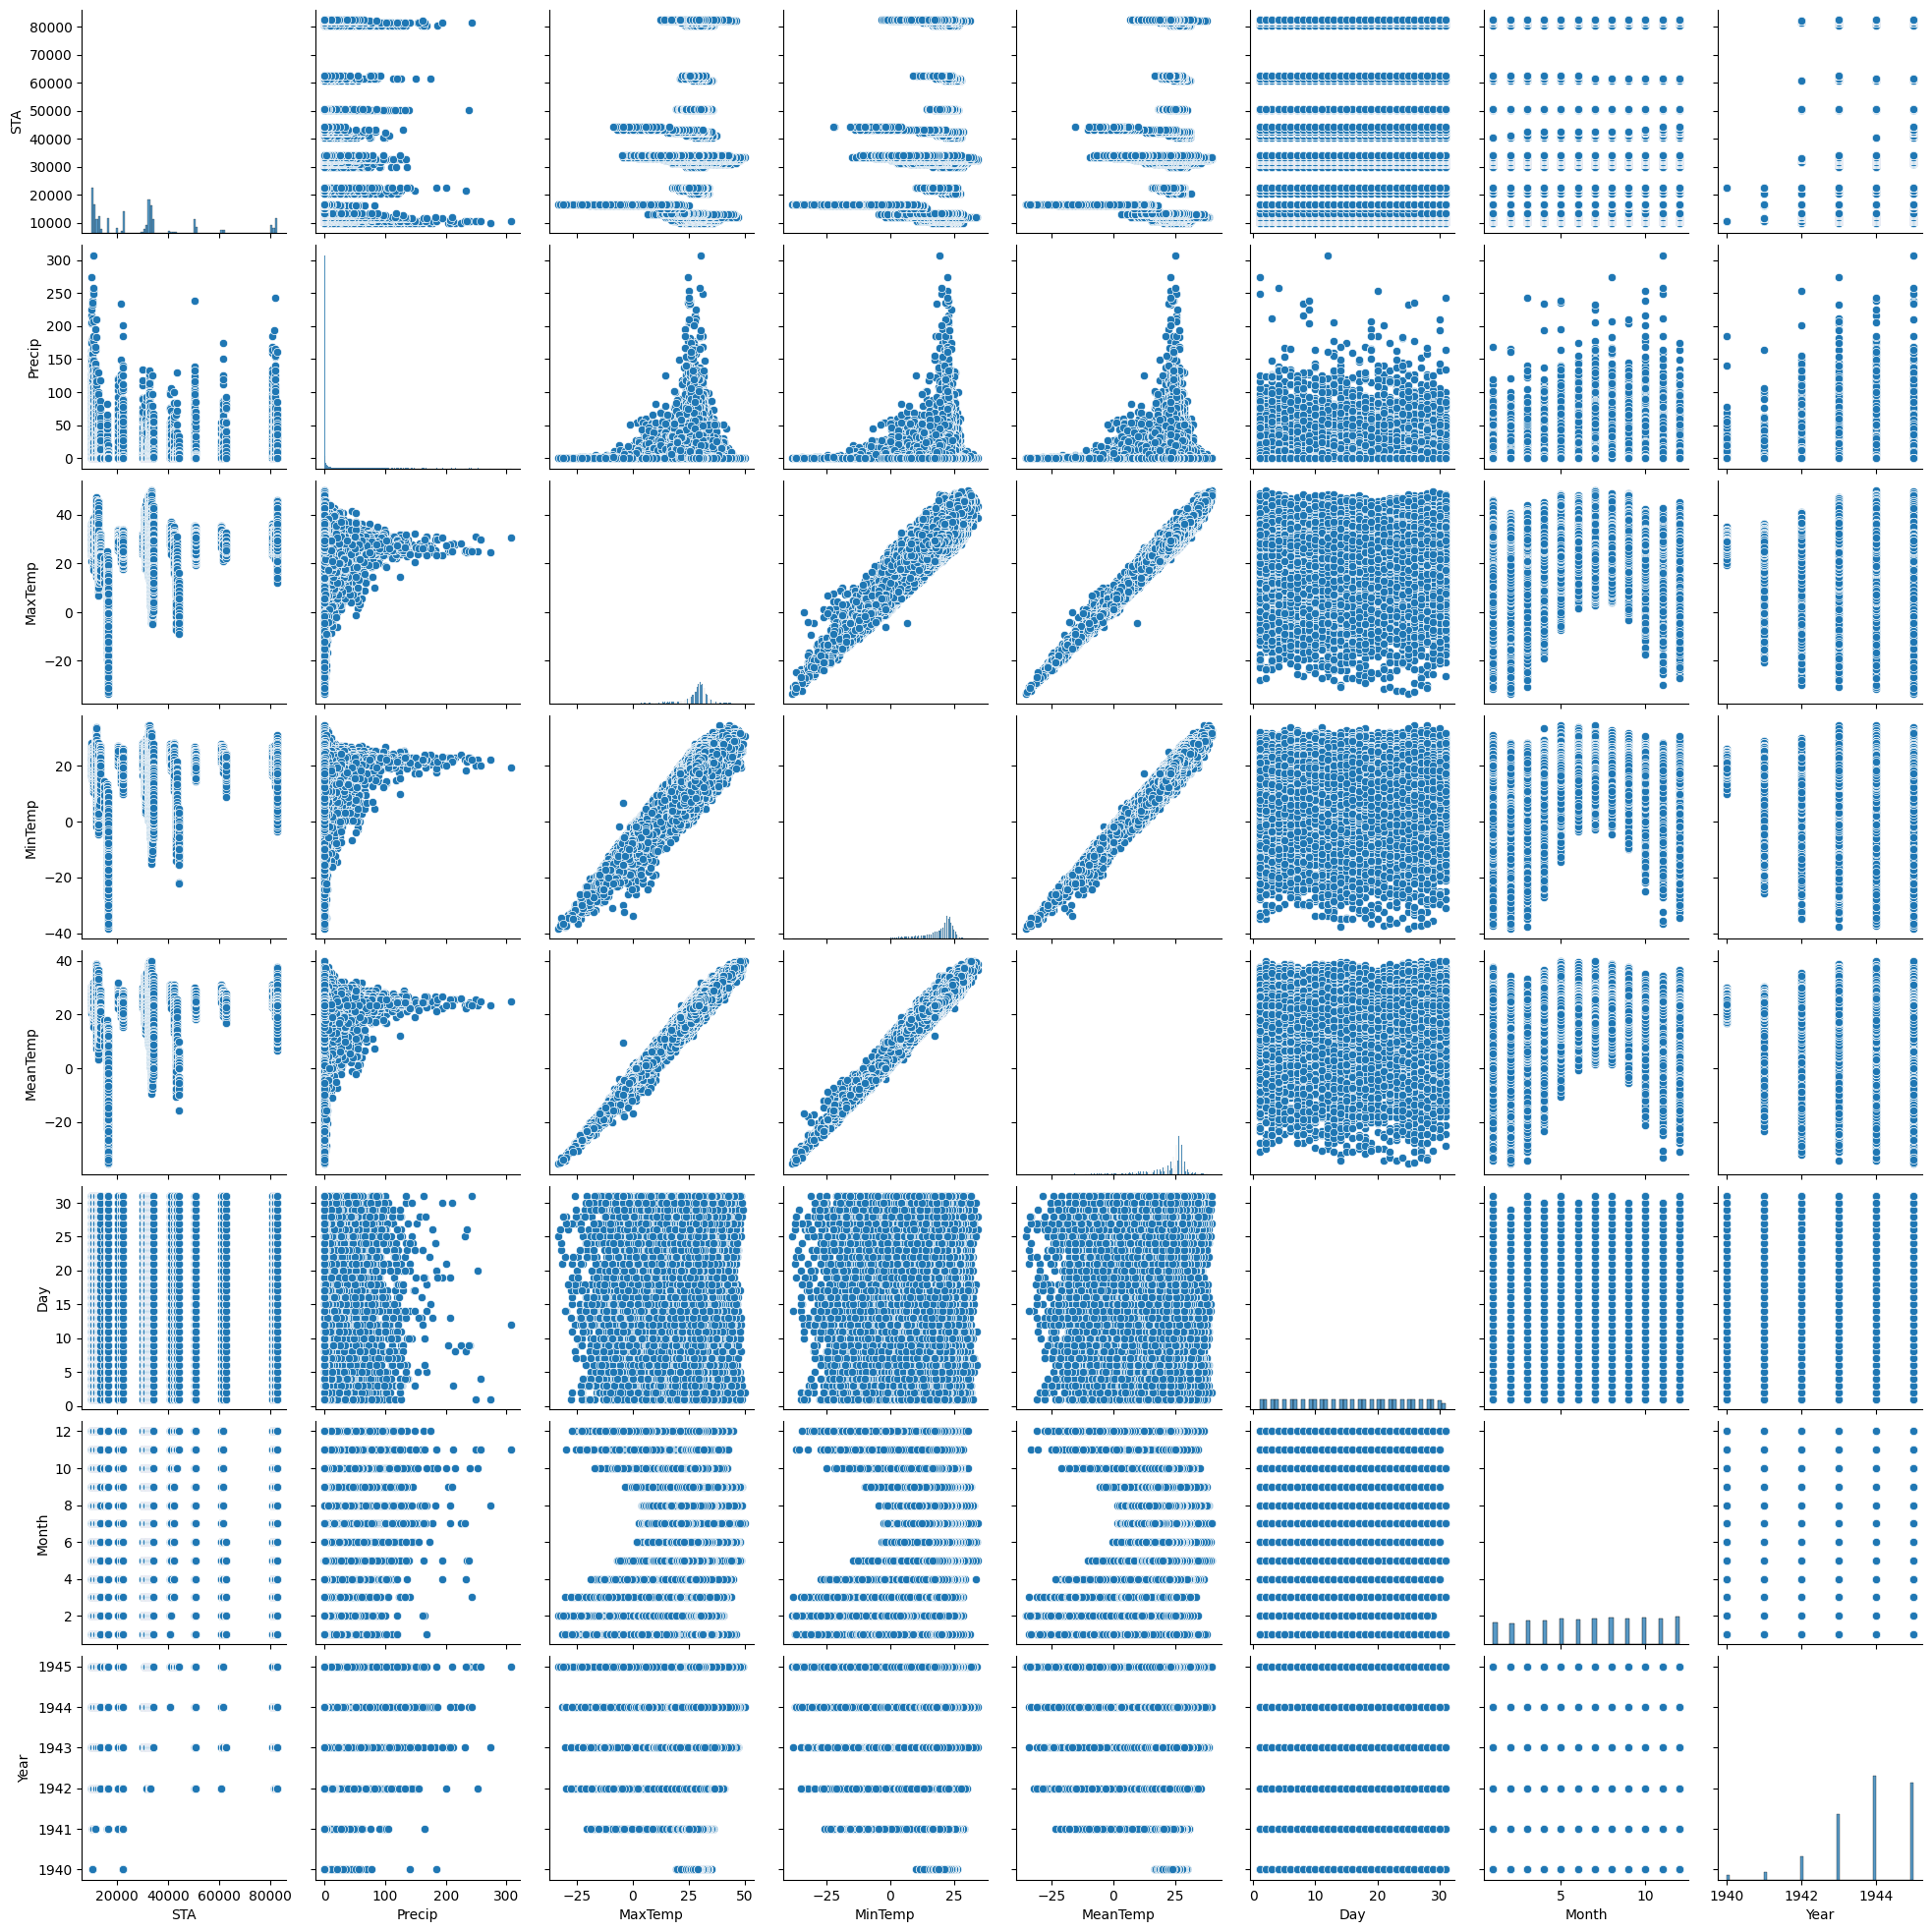

In [157]:
sns.pairplot(df) #Let's take a quick look at how each column pairs with one another in terms of linear relationship.

plt.show()

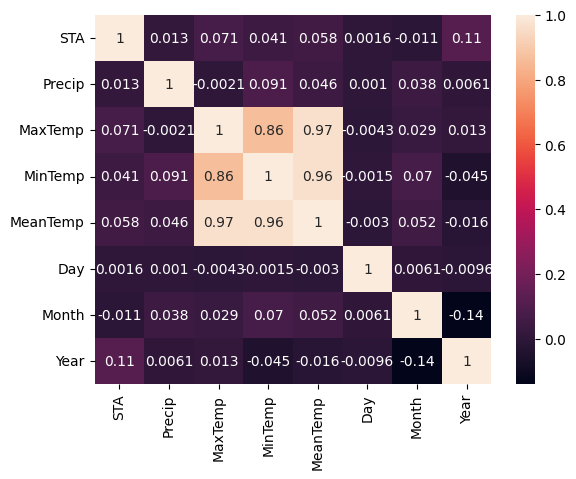

In [158]:
sns.heatmap(df.corr(), annot=True) #Always insightful to check the heatmap of the correlations and see if we can notice anything.

plt.show()

In [159]:
def correlation_to_drop(df, threshold):
    """This function checks for correlations between the independent features(the X). If correlations are really big(more than 85%), we can omit one of the features since they are quite dependant on one another and it would confuse our model. Returns a set of the columns where correlations are higher than the specified threshold between the independent features."""
    corr = df.corr()

    columns_to_drop = set()

    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i, j]) > threshold:
                columns_to_drop.add(corr.columns[i])

    return columns_to_drop

In [160]:
print(correlation_to_drop(df, 0.90)) #We get MeanTemp as a result, which is said to be highly correlated to other features(MinTemp, MaxTemp etc.). This makes total sense. We must remove this column, as it actually "leaks" the data. If our model knew both MinTemp AND MeanTemp, it can mathematically deduct the MaxTemp by calculating it easily. By removing this, we prevent the model from basically "cheating the results". Now our model only has the time data, MinTemp data and Precip data to rely on when predicting the MaxTemp.

columns_to_drop = correlation_to_drop(df, 0.90)

{'MeanTemp'}


In [161]:
df.drop(columns_to_drop, axis=1, inplace=True)

In [162]:
df.head() #Every column that is left after all the cleaning.

,STA,Precip,MaxTemp,MinTemp,Day,Month,Year
0,10001,1.016,25.555556,22.222222,1,7,1942
1,10001,0.000,28.888889,21.666667,2,7,1942
2,10001,2.540,26.111111,22.222222,3,7,1942
3,10001,2.540,26.666667,22.222222,4,7,1942
4,10001,0.000,26.666667,21.666667,5,7,1942


In [163]:
#Training Our Prediction Model - Predicting Max Temp given Min Temp and other features

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [165]:
#Our Features

In [166]:
X = df.drop("MaxTemp", axis=1) # X is everything but MaxTemp. These are the features that we will feed into the model which will then predict "y", the output.
y = df["MaxTemp"] # y is the MaxTemp, our prediction target.

In [167]:
X.head()

,STA,Precip,MinTemp,Day,Month,Year
0,10001,1.016,22.222222,1,7,1942
1,10001,0.000,21.666667,2,7,1942
2,10001,2.540,22.222222,3,7,1942
3,10001,2.540,22.222222,4,7,1942
4,10001,0.000,21.666667,5,7,1942


In [168]:
y.head()

0    25.555556
1    28.888889
2    26.111111
3    26.666667
4    26.666667
Name: MaxTemp, dtype: float64

In [169]:
type(X) #Make sure X is always a Dataframe

pandas.core.frame.DataFrame

In [170]:
type(y) #Make sure y is always a series

pandas.core.series.Series

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15, test_size=0.30) #Split our X and y datasets into two parts; train and test data. We will use the "_train" ones to train our model, and then feed it the "X_test". It will give us a list of predictions, which we will use it to compare with "y_test". test_size=0.30 means 70% of our original data(DF) will be allocated for training purposes, and 30%(the 0.30 here) will be used for testing once the training is complete.

In [172]:
X_train.head() # 70% Training data.

,STA,Precip,MinTemp,Day,Month,Year
77258,32904,0.000,5.000000,10,1,1945
117826,82502,1.270,13.333333,27,5,1945
3206,10102,8.382,22.222222,5,10,1943
25239,11610,3.048,23.333333,9,8,1944
102783,50403,19.304,21.111111,2,6,1945


In [173]:
X_test.head() # 30% Testing data. Notice how MaxTemp column is not here. This is because we seperated them as X_test and y_test before. We are essentially making our model predict y_test BASED ON X_test.

,STA,Precip,MinTemp,Day,Month,Year
63513,31401,0.000,20.000000,20,12,1943
94275,34123,0.000,8.888889,8,11,1944
77962,32906,0.000,7.222222,14,1,1945
8227,10701,0.254,22.777778,29,4,1945
10791,10705,0.000,21.111111,15,3,1944


In [174]:
#Let's scale our X via Standardization. Always a good measure to make our features easer to digest for the model. What scaling does is it basically converts the numerical values inside the dataset into smaller - or bigger - values depending on the original data. This will make the data more understandable to our model, as the numbers will become more closer to each other.

In [175]:
scaler = StandardScaler()

In [176]:
X_train = scaler.fit_transform(X_train) #Always use fit_transform for X_train. Does calculations on X_train, allowing our model to understand X_train well.
X_test = scaler.transform(X_test) #NEVER use fit_transform or fit on X_test. This causes data leakage as "fit" does calculations on the dataset. Transforming only allows the model to "not know anything about X_test".

#No need to apply anything to y_train or y_test as we do not want to touch those values at all. Scaling changes the values. We want values in y to stay the same so we can understand the output directly in its original unit.

In [177]:
#Everything, is ready, let's train the model now!

In [178]:
linear = LinearRegression()

linear.fit(X_train, y_train) #The line that does the actual training. It will basically study X_train(all the features) and y_train(the result according to features in X_train) and understand the data, allowing it to predict future values(y) depending on new data(X).

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [179]:
y_prediction = linear.predict(X_test) #Our first ever prediction! This will basically return an entire list of MaxTemp predictions based on X_test.

In [180]:
y_prediction.shape #34707 predictions

(34707,)

In [181]:
X_test.shape #Our test data was 34707 rows as well, so the number of outputs are matching the number of inputs

(34707, 6)

In [182]:
#What now?

In [183]:
#We can visualize and measure our model's performance via several ways. Let's start with popular metrics that define success.

In [184]:
mae = mean_absolute_error(y_test, y_prediction)
mse = mean_squared_error(y_test, y_prediction)
r2 = r2_score(y_test, y_prediction) #Basically telling us how successful our model is in terms of percentage.

print("Mean Absolute Error(MAE):", mae)
print("Mean Squared Error(MSE):", mse)
print("R2 Score:", r2) #Success of our model's predictions when predicting it by X_test alone are 76%.

Mean Absolute Error(MAE): 3.072028424894678
Mean Squared Error(MSE): 15.482418936097508
R2 Score: 0.7595402442703852


In [185]:
#Basically, our model will be 76% successful in predicting the output when new data arrives!

In [186]:
#Let's also visualize our data.

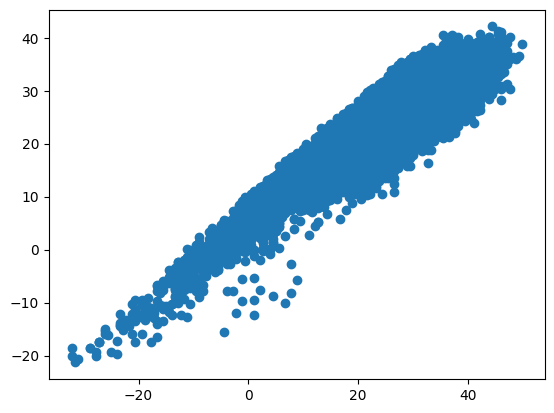

In [187]:
plt.scatter(y_test, y_prediction)

plt.show()

In [188]:
#As we can see, it's a linear match. Both the y_test and y_prediction are pretty much linear, which visualizes our model's perfromance.

In [189]:
#In summary, we have successfully read the data, understood the data, cleaned the data, prepared the data for machine learning, trained a prediction model and gained 76% accuracy in our predictions.

In [190]:
#Every dataset is different, needs its own study and cleanup, but the steps above stay the same. How well your model will perform is directly tied to how well you understand the data and prepare it.

In [191]:
#Extras

In [192]:
#Aside from LinearRegression(), we have couple other regressors that do complex regression via penalizing unnecessary features that we put in + Cross Validation across dataset. I will not dive deep into this, but you can still and should learn more about these regressions!

Mean Absolute Error: 3.0711901679637434
Mean Square Error: 15.484350639490096
R2 Score: 0.7595102426971272


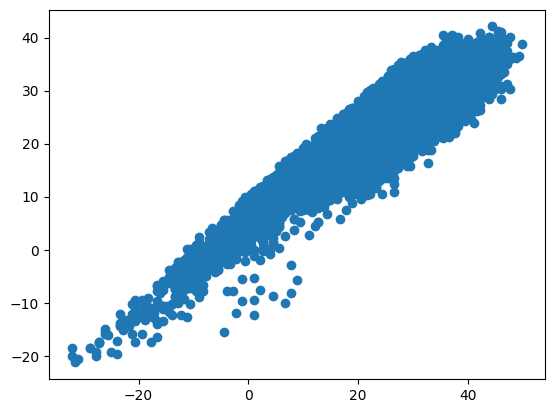

In [193]:
# Lasso with Cross Validation

from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=5)

lasso_cv.fit(X_train, y_train)
y_pred_lasso_cv = lasso_cv.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_lasso_cv)
mse = mean_squared_error(y_test, y_pred_lasso_cv)
r2 = r2_score(y_test, y_pred_lasso_cv)

print("Mean Absolute Error:", mae)
print("Mean Square Error:", mse)
print("R2 Score:", r2)

plt.scatter(y_test, y_pred_lasso_cv)

plt.show()

Mean Absolute Error: 3.0719757876230465
Mean Square Error: 15.482474152269385
R2 Score: 0.7595393866997914


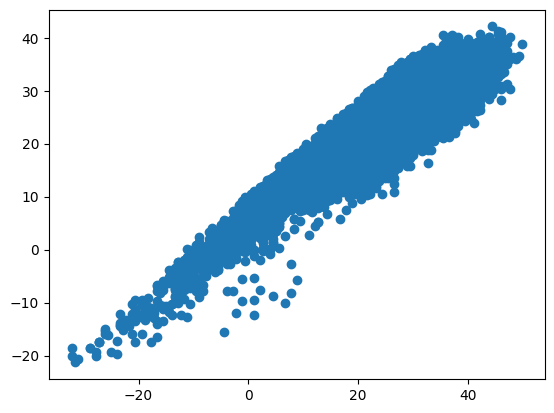

In [194]:
#Ridge with Cross Validation

from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(cv=5) #K-fold(5 fold)

ridge_cv.fit(X_train, y_train)
y_pred_ridge_cv = ridge_cv.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_ridge_cv)
mse = mean_squared_error(y_test, y_pred_ridge_cv)
r2 = r2_score(y_test, y_pred_ridge_cv)

print("Mean Absolute Error:", mae)
print("Mean Square Error:", mse)
print("R2 Score:", r2)

plt.scatter(y_test, y_pred_ridge_cv)

plt.show()

Mean Absolute Error: 3.0685564309331688
Mean Square Error: 15.490613483127497
R2 Score: 0.7594129735392884


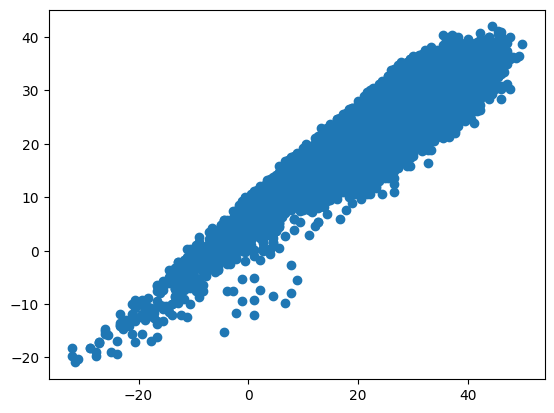

In [195]:
#ElasticNet with Cross Validation

from sklearn.linear_model import ElasticNetCV

elastic_net_cv = ElasticNetCV(cv=5) #K-fold(5 fold)

elastic_net_cv.fit(X_train, y_train)
y_pred_elastic_net_cv = elastic_net_cv.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_elastic_net_cv)
mse = mean_squared_error(y_test, y_pred_elastic_net_cv)
r2 = r2_score(y_test, y_pred_elastic_net_cv)

print("Mean Absolute Error:", mae)
print("Mean Square Error:", mse)
print("R2 Score:", r2)

plt.scatter(y_test, y_pred_elastic_net_cv)

plt.show()

In [196]:
#All models are pretty much identical. There is not much to improve in terms of the Linear Regression models. However, we can most definitely play with the columns and see if we could feed in more features. We deleted a lot of columns, some had small amount of data in it. What could be done is keep those columns with data in it and do the testing with a smaller dataset, but more columns. It is experimentation at this point.

In [197]:
#This is by no means a perfect model and I am sure there are better ways of explaining this model, like Time Series Models since our dataset contains time in Day, Month and Year formats. This codebase serves as an introduction to Data Science, Exploratory Data Analysis(EDA) and Machine Learning(ML). I hope you gained valuable insights from this! Take care until the next one.